In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = fetch_california_housing()

X = data.data[:, 0]   # only one feature (MedInc)
y = data.target

In [38]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(X,y ,test_size=0.2,random_state=42)

In [39]:
x_train_tensor = torch.tensor(x_train,dtype=torch.float32).view(-1,1)
x_test_tensor = torch.tensor(x_test,dtype=torch.float32).view(-1,1)
y_train_tensor = torch.tensor(y_train,dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test,dtype=torch.float32).view(-1,1)

In [6]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out = self.linear(x)
    return out

In [55]:

lr = 0.0001
epochs =1000


model = LinearModel()

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

train_loss = []
test_loss=[]


# training loop
for epoch in range(epochs):
  y_hat = model(x_train_tensor)
  loss=loss_func(y_hat,y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #  storing the loss for plotting it .
  train_loss.append(loss.item())



  with torch.no_grad():
    y_hat = model(x_test_tensor)
    loss = loss_func(y_hat,y_test_tensor)
    test_loss.append(loss.item())





y_hat = y_hat.numpy().flatten()

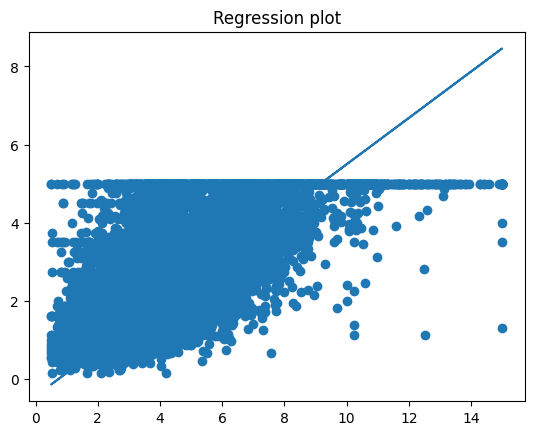

In [56]:
plt.title("Regression plot")
plt.scatter(X,y)
plt.xlabel(" ")
plt.ylabel(" ")
plt.plot(x_test, y_hat)
plt.show()

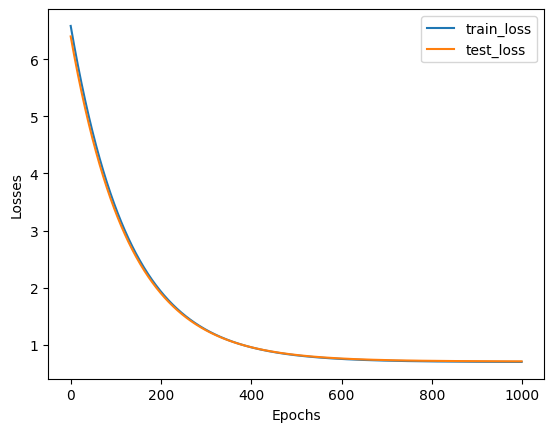

In [53]:
#  plotting the loss

plt.plot(train_loss,label="train_loss")
plt.plot(test_loss,label="test_loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.show()

In [57]:
# test_loss